# **01 - Data Uderstanding Analysis**


In [1]:
# !pip install squarify

In [2]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import shapiro
import statsmodels.api as sm
import warnings
from wordcloud import WordCloud
from scipy.stats import gaussian_kde
from collections import Counter
from datetime import datetime
import ast
warnings.filterwarnings("ignore")

Load DAta and Explore Files

### **Video Games Sales Data**

In [3]:
# load data
vgsales = pd.read_csv("Kaggle Data/vgsales.csv")
vgsales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
print(vgsales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


In [5]:
print(vgsales.describe(include='all'))

                Rank                         Name Platform          Year  \
count   16598.000000                        16598    16598  16327.000000   
unique           NaN                        11493       31           NaN   
top              NaN  Need for Speed: Most Wanted       DS           NaN   
freq             NaN                           12     2163           NaN   
mean     8300.605254                          NaN      NaN   2006.406443   
std      4791.853933                          NaN      NaN      5.828981   
min         1.000000                          NaN      NaN   1980.000000   
25%      4151.250000                          NaN      NaN   2003.000000   
50%      8300.500000                          NaN      NaN   2007.000000   
75%     12449.750000                          NaN      NaN   2010.000000   
max     16600.000000                          NaN      NaN   2020.000000   

         Genre        Publisher      NA_Sales      EU_Sales      JP_Sales  \
count    1

In [6]:
print(vgsales.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [7]:
vgsales.dropna(inplace=True)

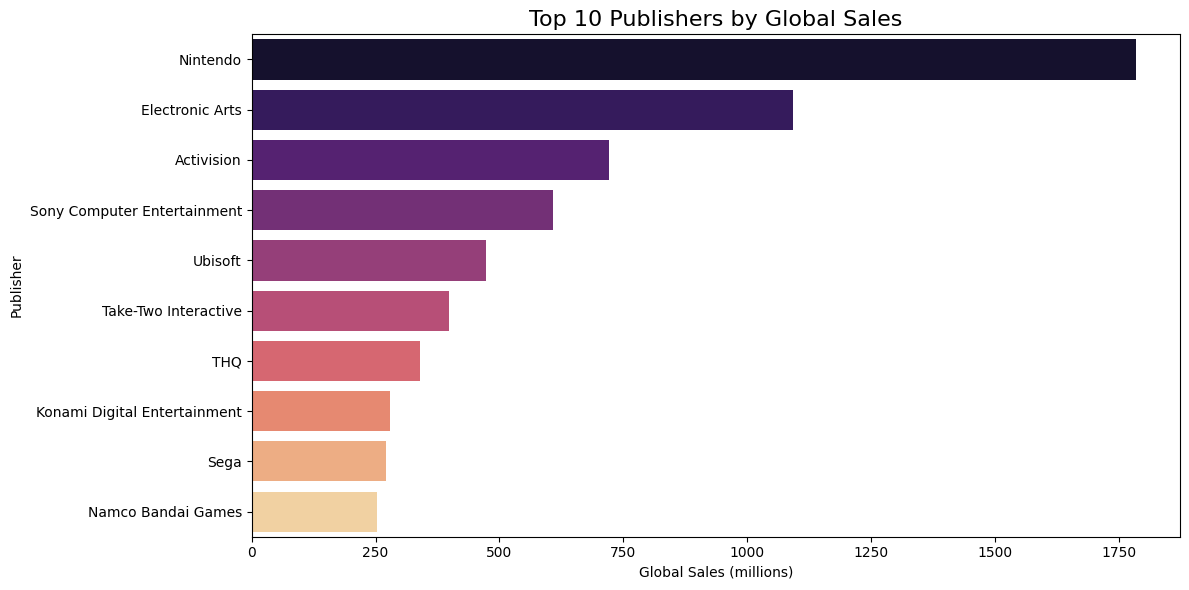

In [8]:
top_publishers = vgsales.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette="magma")
plt.title("Top 10 Publishers by Global Sales", fontsize=16)
plt.xlabel("Global Sales (millions)")
plt.ylabel("Publisher")
plt.tight_layout()
plt.show()


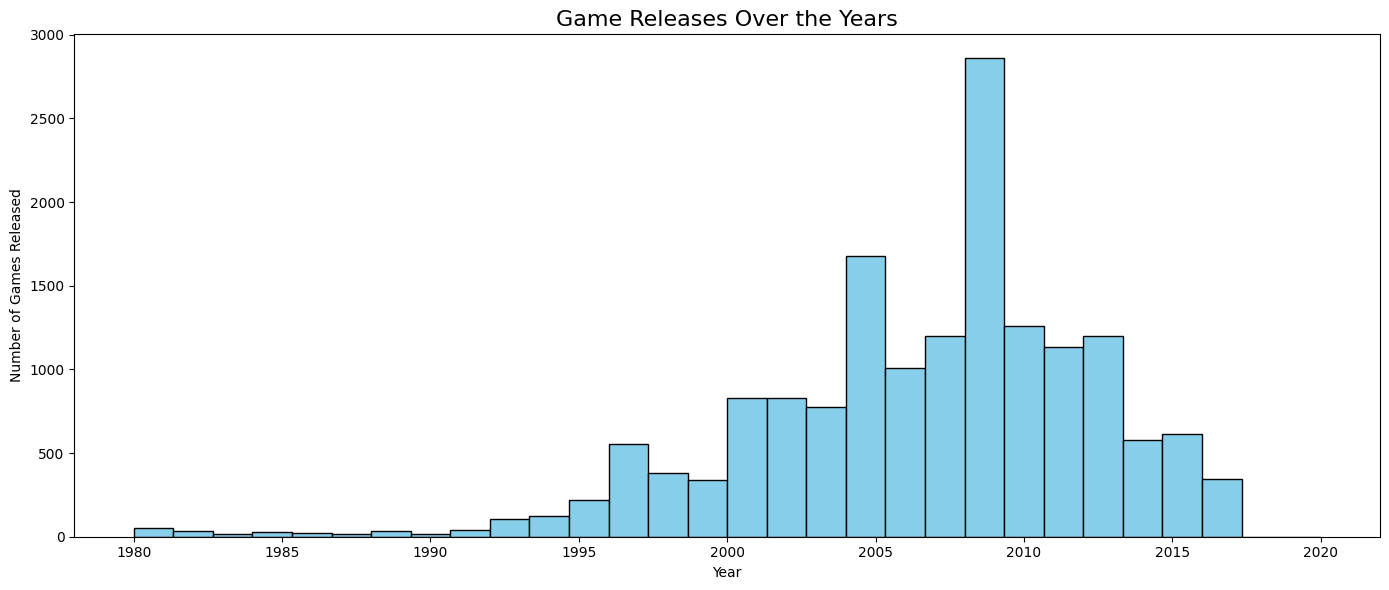

In [9]:
plt.figure(figsize=(14,6))
plt.hist(vgsales['Year'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title("Game Releases Over the Years", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Games Released")
plt.tight_layout()
plt.show()

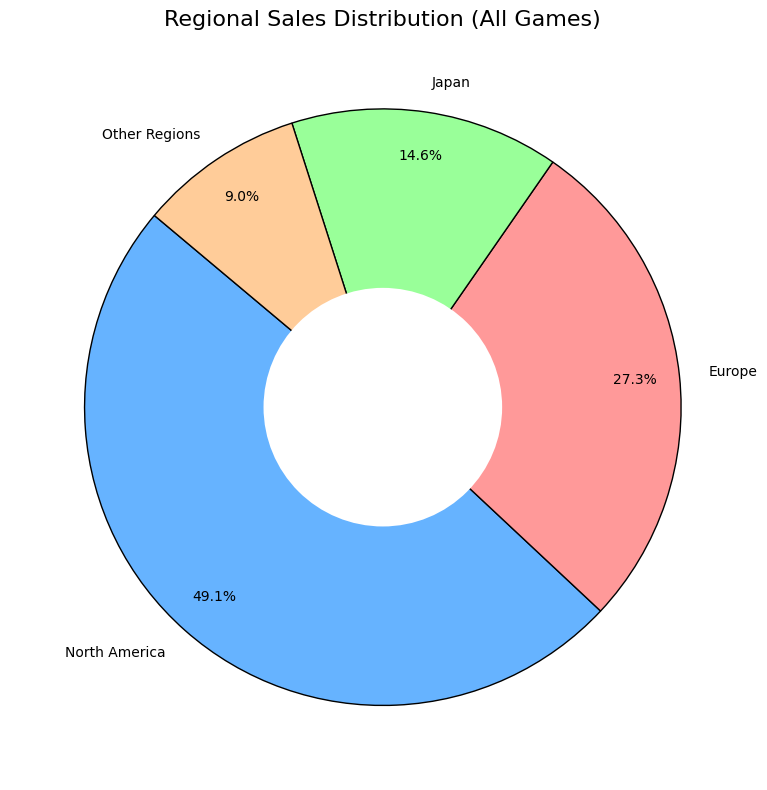

In [10]:
region_sales = vgsales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
labels = ['North America', 'Europe', 'Japan', 'Other Regions']
colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99']

#pie chart
plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    region_sales,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black'},
    pctdistance=0.85
)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Regional Sales Distribution (All Games)", fontsize=16)
plt.tight_layout()
plt.show()


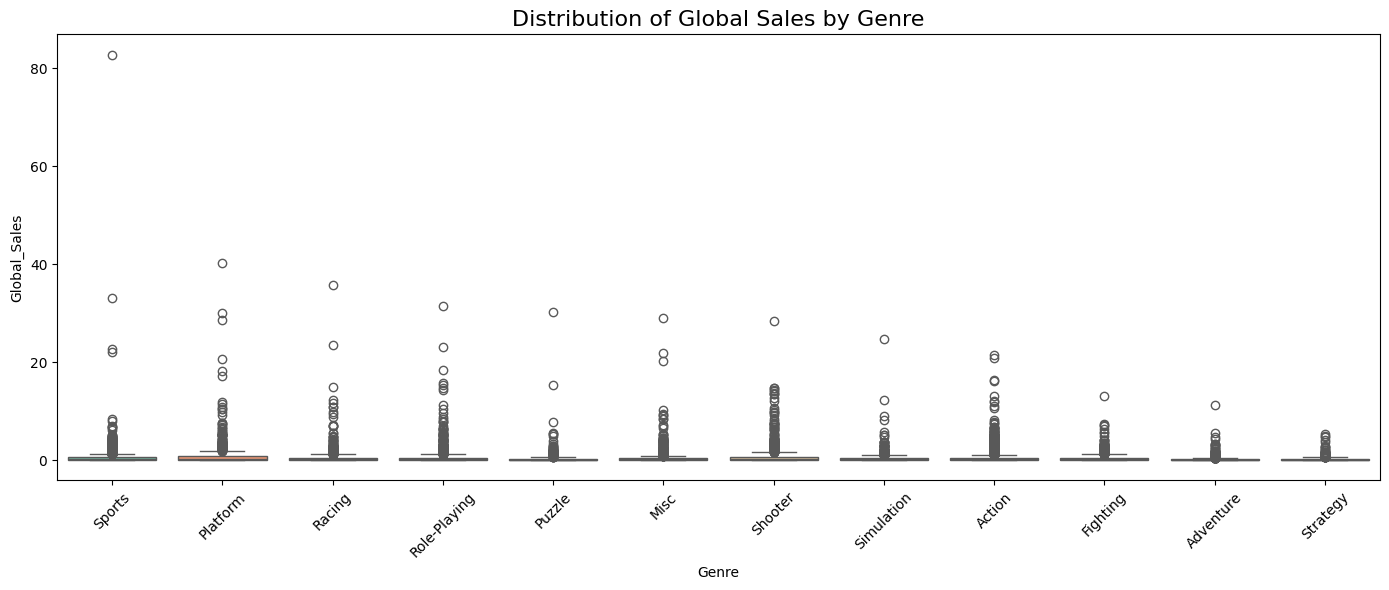

In [11]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Genre', y='Global_Sales', data=vgsales, palette='Set2')
plt.xticks(rotation=45)
plt.title("Distribution of Global Sales by Genre", fontsize=16)
plt.tight_layout()
plt.show()

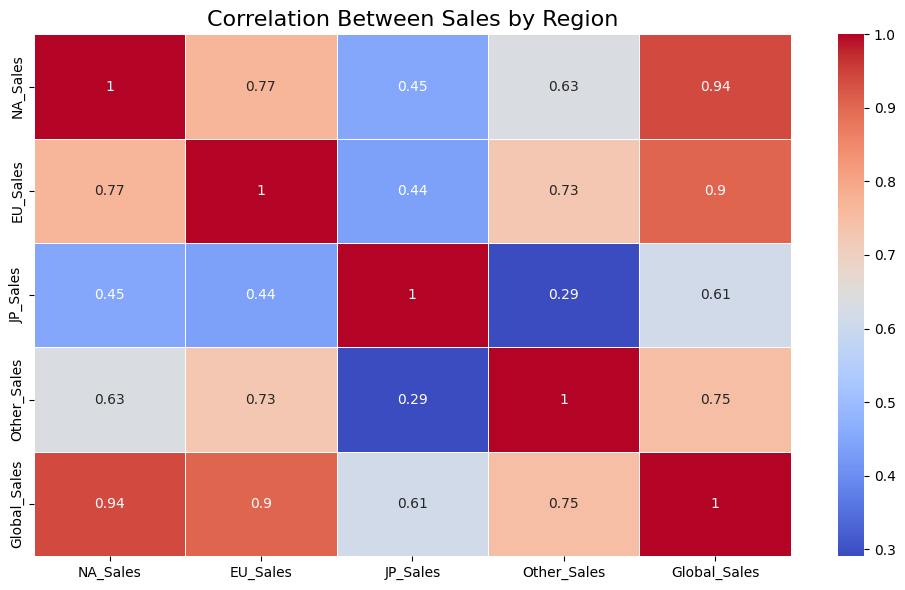

In [12]:
plt.figure(figsize=(10,6))
corr = vgsales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Sales by Region", fontsize=16)
plt.tight_layout()
plt.show()

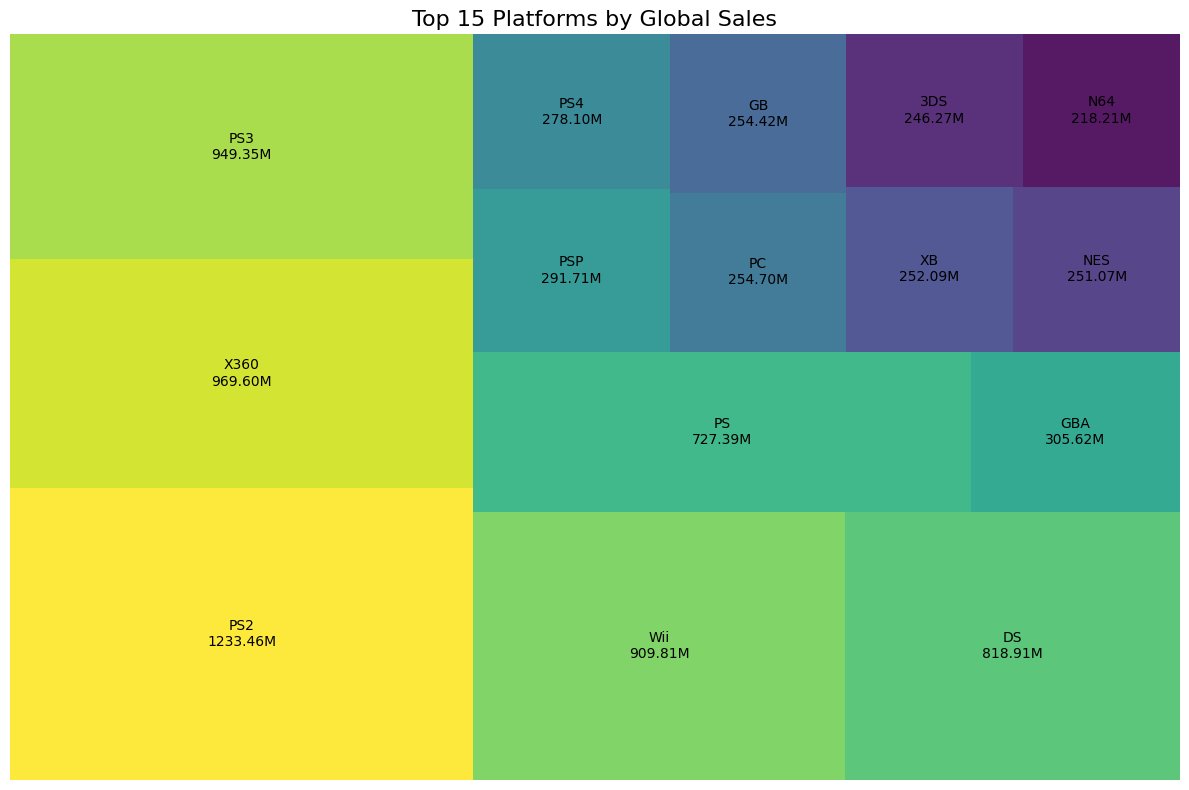

In [13]:
platform_sales = vgsales.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(15)
labels = [f"{platform}\n{sales:.2f}M" for platform, sales in platform_sales.items()]
sizes = platform_sales.values
colors = plt.cm.viridis_r(np.linspace(0, 1, len(sizes)))

#plot
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.9, text_kwargs={'fontsize':10})
plt.title("Top 15 Platforms by Global Sales", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

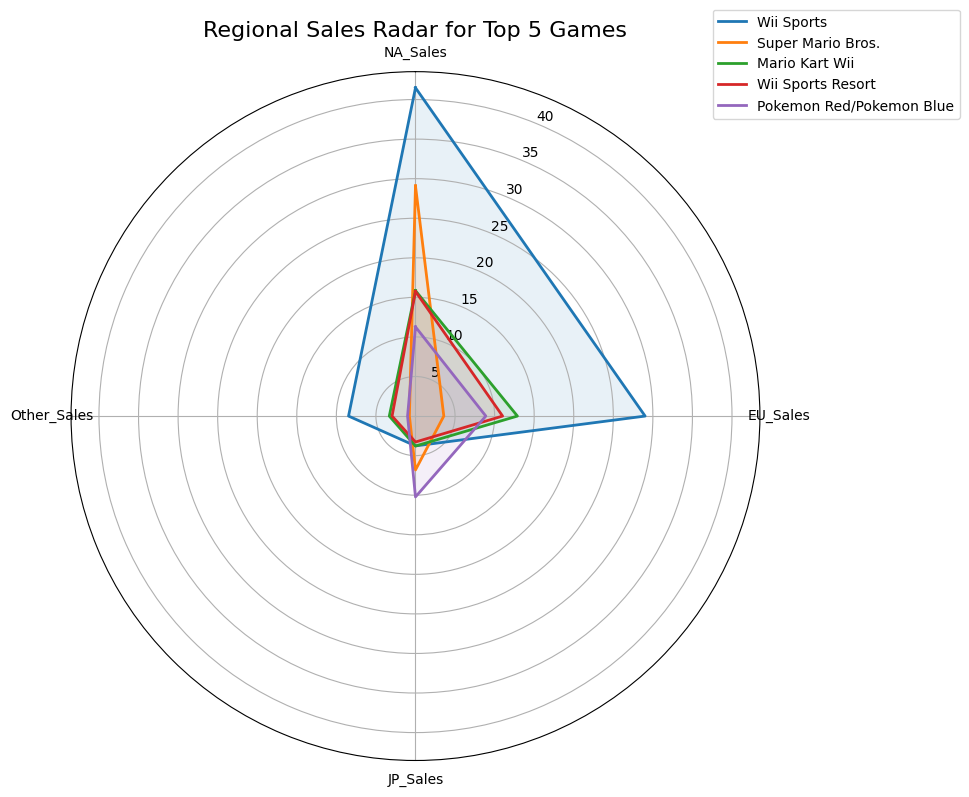

In [14]:
top_5 = vgsales.head(5).set_index("Name")[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
categories = top_5.columns.tolist()
num_vars = len(categories)

#create angle values for radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  #complete the loop

#  radar plot
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)

#plot each game
for game in top_5.index:
    values = top_5.loc[game].tolist()
    values += values[:1]  #complete the loop
    ax.plot(angles, values, label=game, linewidth=2)
    ax.fill(angles, values, alpha=0.1)

#set labels and ticks
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), categories)
ax.set_title("Regional Sales Radar for Top 5 Games", fontsize=16)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

In [15]:
genre_stats = vgsales.groupby("Genre")["Global_Sales"].describe()
print(genre_stats)

               count      mean       std   min   25%    50%    75%    max
Genre                                                                    
Action        3251.0  0.529942  1.165238  0.01  0.07  0.190  0.500  21.40
Adventure     1274.0  0.184137  0.510902  0.01  0.02  0.060  0.160  11.18
Fighting       836.0  0.531160  0.957915  0.01  0.08  0.210  0.550  13.04
Misc          1686.0  0.468488  1.332150  0.01  0.06  0.160  0.410  29.02
Platform       875.0  0.947577  2.599940  0.01  0.09  0.280  0.815  40.24
Puzzle         570.0  0.424930  1.577565  0.01  0.04  0.105  0.300  30.26
Racing        1225.0  0.593273  1.677373  0.01  0.07  0.190  0.530  35.82
Role-Playing  1470.0  0.628456  1.717452  0.01  0.07  0.190  0.530  31.37
Shooter       1282.0  0.800468  1.833578  0.01  0.08  0.230  0.740  28.31
Simulation     848.0  0.459882  1.207428  0.01  0.05  0.160  0.430  24.76
Sports        2304.0  0.568247  2.104926  0.01  0.09  0.220  0.560  82.74
Strategy       670.0  0.258612  0.5245

**ANOVA: Do genres significantly affect global sales?**

In [16]:
model = ols('Global_Sales ~ C(Genre)', data=vgsales).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Results:\n", anova_table)

ANOVA Results:
                 sum_sq       df          F        PR(>F)
C(Genre)    485.528082     11.0  18.176106  1.335889e-36
Residual  39531.977718  16279.0        NaN           NaN


**Normality Test (Shapiro-Wilk) for Global Sales**

In [17]:
shapiro_test = stats.shapiro(vgsales['Global_Sales'].sample(500))
print(f"Shapiro-Wilk Test: W={shapiro_test.statistic:.3f}, p-value={shapiro_test.pvalue:.5f}")

Shapiro-Wilk Test: W=0.246, p-value=0.00000


**Correlation Test: NA vs EU Sales**

In [18]:
pearson_corr = stats.pearsonr(vgsales['NA_Sales'], vgsales['EU_Sales'])
print(f"Pearson Correlation (NA vs EU Sales): r = {pearson_corr[0]:.3f}, p-value = {pearson_corr[1]:.4f}")

Pearson Correlation (NA vs EU Sales): r = 0.769, p-value = 0.0000


### **RAWG Data**

In [19]:
rawg = pd.read_csv("raw_rawg.csv")
rawg

,name,released,platforms,metacritic,rating,ratings_count,playtime,tags,genres
0,Half-Life,1998-11-19,"['PC', 'macOS', 'Linux', 'PlayStation 2', 'Dre...",96.0,4.37,2353,3,"['Singleplayer', 'Для одного игрока', 'Экшен',...","['Shooter', 'Action']"
1,Fallout,1997-09-30,"['PC', 'macOS', 'Linux', 'Classic Macintosh']",NaN,4.20,1199,1,"['Singleplayer', 'Для одного игрока', 'Приключ...",['RPG']
2,Half-Life: Opposing Force,1999-11-19,"['PC', 'macOS', 'Linux']",NaN,3.85,734,3,"['Singleplayer', 'Для одного игрока', 'Экшен',...","['Shooter', 'Action']"
3,Resident Evil 2 (1998),1998-01-21,"['PC', 'PlayStation', 'GameCube', 'Nintendo 64...",90.0,4.32,909,13,"['Singleplayer', 'Atmospheric', 'Great Soundtr...",['Action']
4,Team Fortress Classic,1999-04-01,"['PC', 'macOS', 'Linux']",NaN,2.92,382,1,"['Экшен', 'Приключение', 'Multiplayer', 'Для н...",['Action']
...,...,...,...,...,...,...,...,...,...
53602,"OPPAI Ero App Academy Bigger, Better, Electric...",2023-05-24,['PC'],NaN,0.00,2,15,"['Singleplayer', 'Для одного игрока', 'Приключ...","['Casual', 'Adventure']"
53603,RitualSummon,2022-05-17,['PC'],NaN,0.00,0,2,"['Singleplayer', 'Для одного игрока', 'Экшен',...","['Indie', 'Adventure', 'Action', 'RPG']"
53604,Hot Spring Hero,2022-04-08,['PC'],NaN,0.00,0,0,"['Singleplayer', 'Для одного игрока', 'Приключ...","['Casual', 'Adventure', 'RPG']"
53605,Beach Girls,2020-10-24,['PC'],NaN,0.00,0,1,"['Singleplayer', 'Для одного игрока', 'Приключ...","['Adventure', 'Casual', 'Simulation', 'Sports'..."


In [20]:
#parse list-like columns
for col in ['platforms', 'tags', 'genres']:
    rawg[col] = rawg[col].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

In [21]:
#convert 'released' to datetime
rawg['released'] = pd.to_datetime(rawg['released'], errors='coerce')
rawg['release_year'] = rawg['released'].dt.year

In [22]:
#fill missing Metacritic with median or flag them
rawg['metacritic'] = rawg['metacritic'].fillna(rawg['metacritic'].median())

In [23]:
#count of genres
rawg['num_genres'] = rawg['genres'].apply(len)

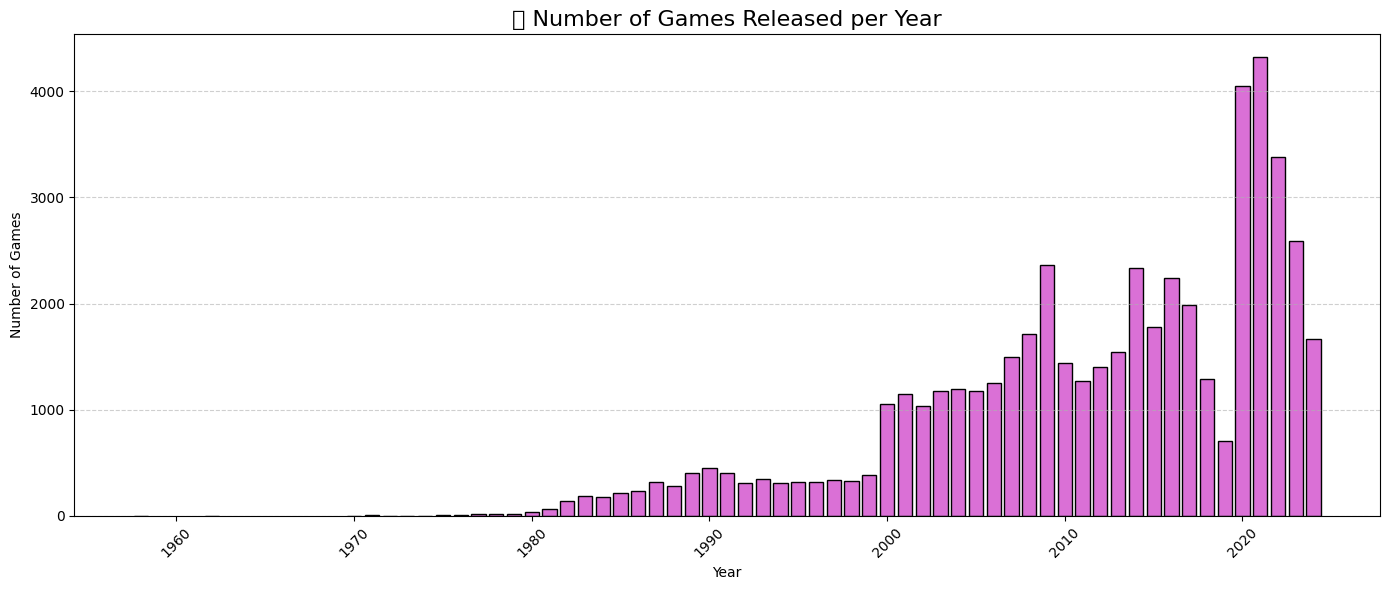

In [24]:
release_years = rawg['release_year'].dropna()

#count games per year
year_counts = release_years.value_counts().sort_index()

plt.figure(figsize=(14,6))
plt.bar(year_counts.index, year_counts.values, color='orchid', edgecolor='black')
plt.title("📅 Number of Games Released per Year", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Games")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


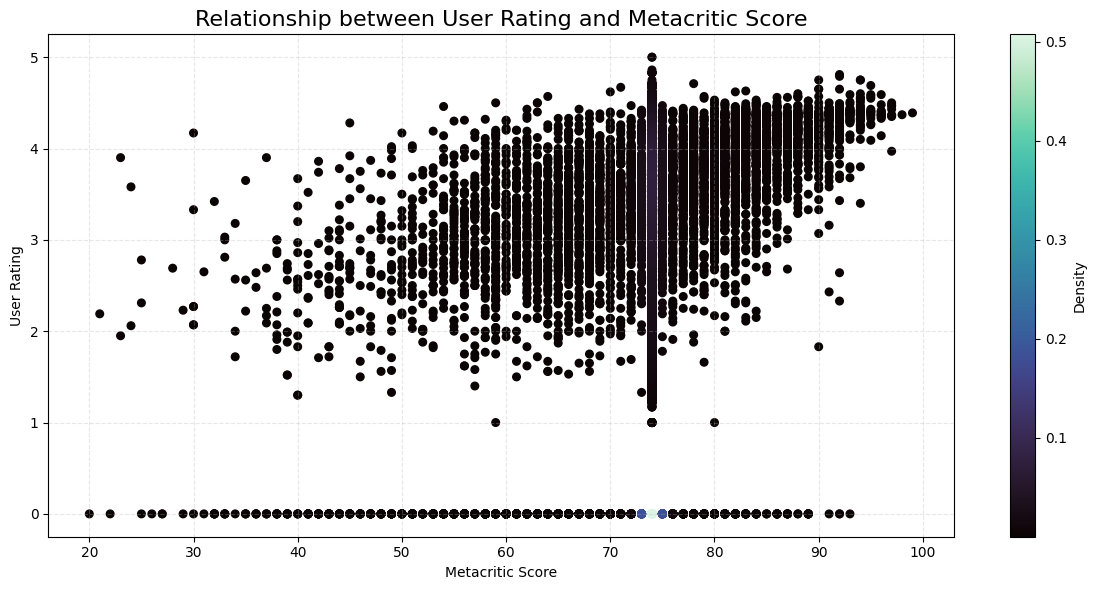

In [25]:
data = rawg[['metacritic', 'rating']].dropna()

#extract x and y
x = data['metacritic'].values
y = data['rating'].values

#stack and apply KDE
xy = np.vstack([x, y])
kde = gaussian_kde(xy)
z = kde(xy)

#sort for better color layering
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

#create the scatter density plot
plt.figure(figsize=(12, 6))
sc = plt.scatter(x, y, c=z, s=30, cmap='mako')
plt.colorbar(sc, label='Density')

plt.title("Relationship between User Rating and Metacritic Score", fontsize=16)
plt.xlabel("Metacritic Score")
plt.ylabel("User Rating")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

Correlation: Rating vs Metacritic

In [26]:
from scipy.stats import pearsonr
r, p = pearsonr(rawg['metacritic'], rawg['rating'])
print(f"Pearson Correlation between Metacritic and Rating: r = {r:.3f}, p = {p:.4f}")

Pearson Correlation between Metacritic and Rating: r = 0.088, p = 0.0000


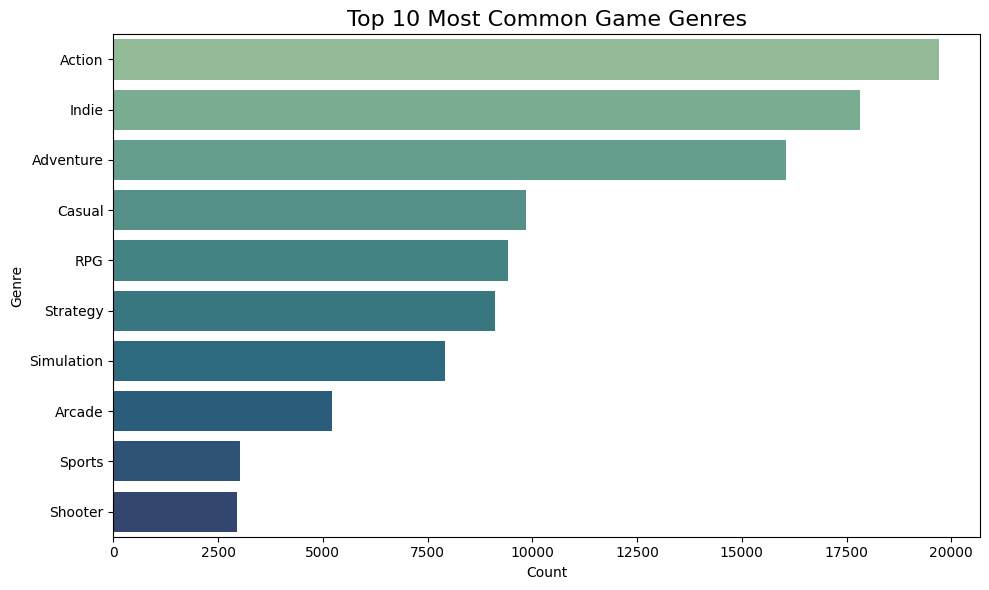

In [27]:
all_genres = [genre for sublist in rawg['genres'] for genre in sublist]
top_genres = pd.Series(Counter(all_genres)).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="crest")
plt.title("Top 10 Most Common Game Genres", fontsize=16)
plt.xlabel("Count")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

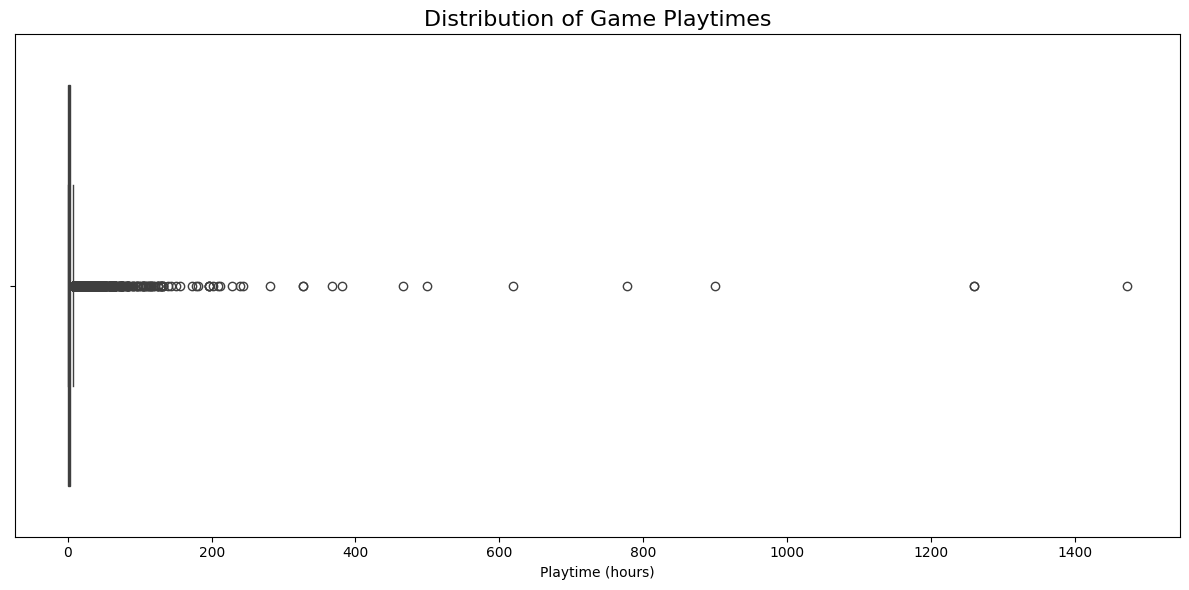

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(x=rawg['playtime'], color='lightseagreen')
plt.title("Distribution of Game Playtimes", fontsize=16)
plt.xlabel("Playtime (hours)")
plt.tight_layout()
plt.show()

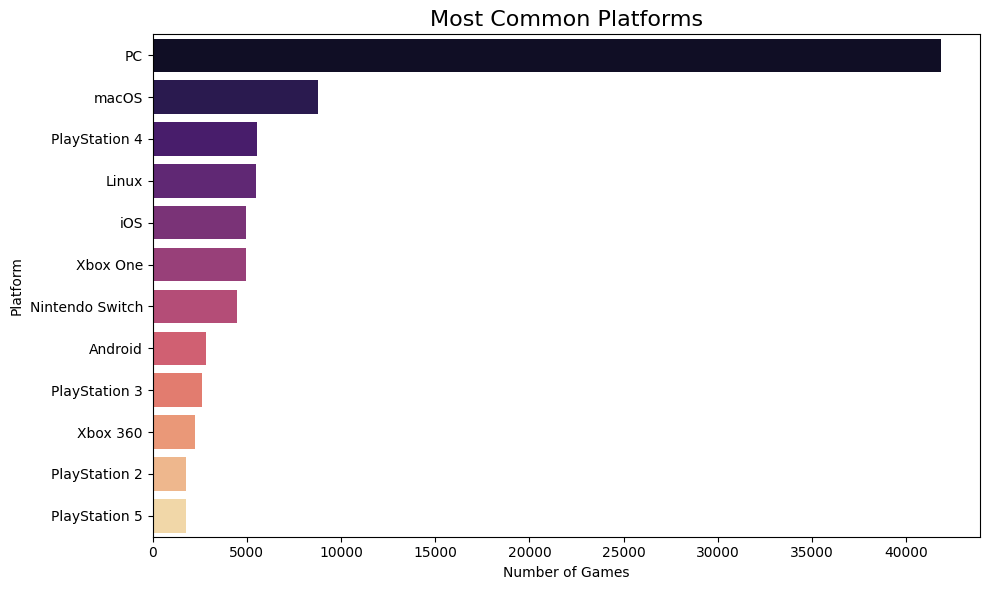

In [29]:
all_platforms = [p for sublist in rawg['platforms'] for p in sublist]
platform_counts = pd.Series(Counter(all_platforms)).sort_values(ascending=False).head(12)

plt.figure(figsize=(10,6))
sns.barplot(x=platform_counts.values, y=platform_counts.index, palette='magma')
plt.title("Most Common Platforms", fontsize=16)
plt.xlabel("Number of Games")
plt.ylabel("Platform")
plt.tight_layout()
plt.show()

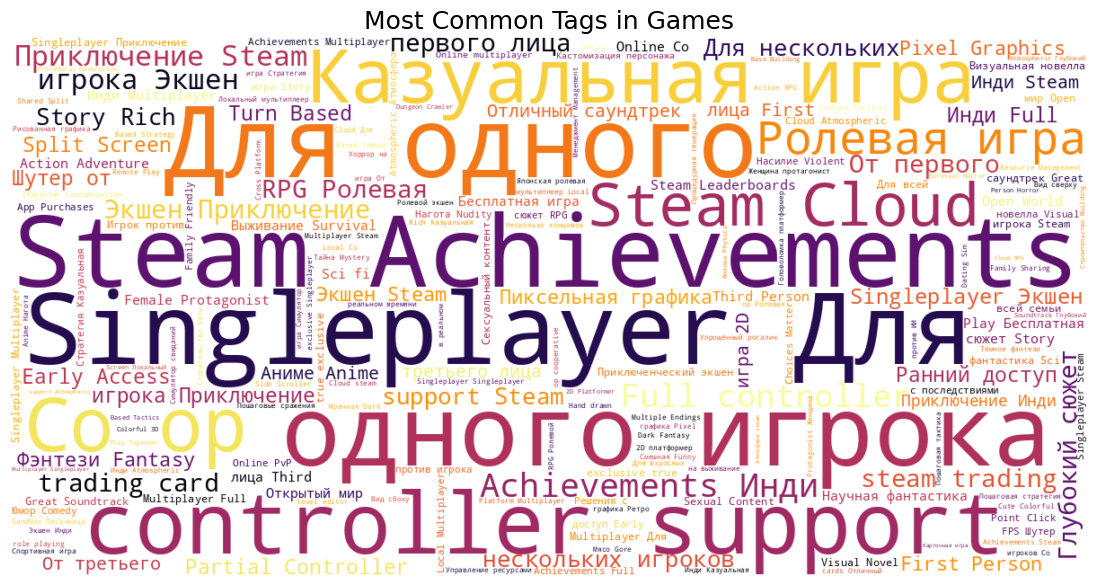

In [30]:
all_tags = [tag for sublist in rawg['tags'] for tag in sublist]
tag_text = ' '.join(all_tags)

wordcloud = WordCloud(width=1200, height=600, background_color='white', colormap='inferno').generate(tag_text)

plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Tags in Games", fontsize=18)
plt.show()

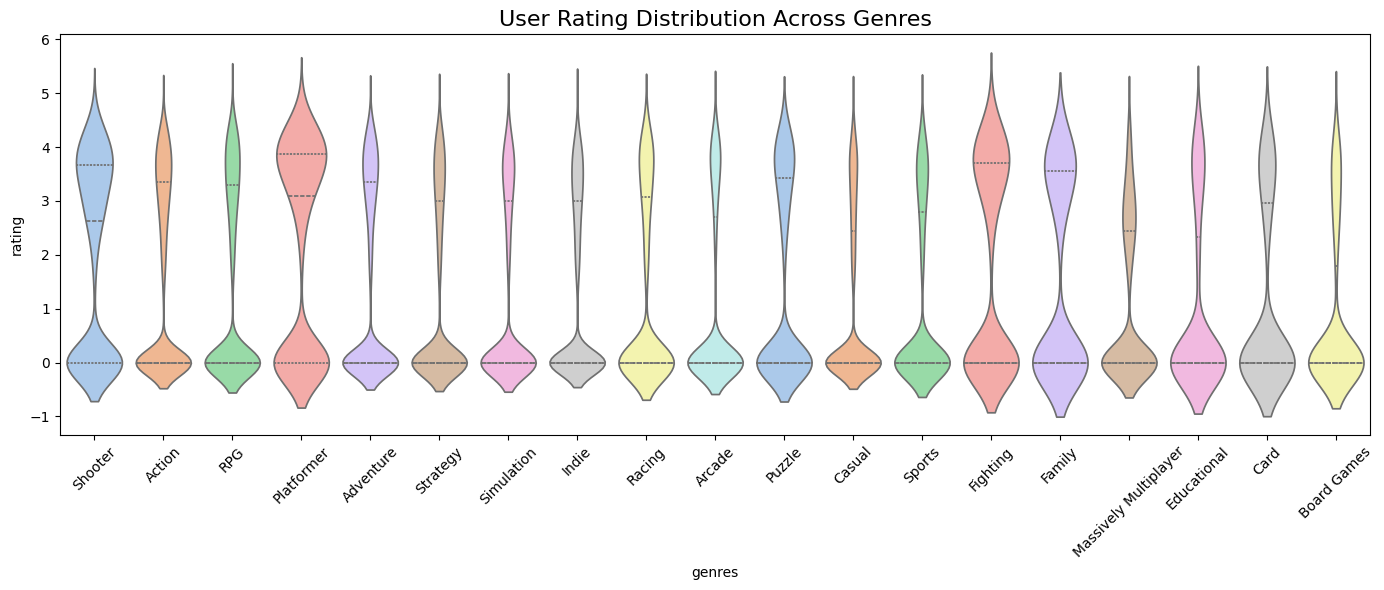

In [32]:
rawg_explode = rawg.explode('genres').reset_index(drop=True)
plt.figure(figsize=(14,6))
sns.violinplot(data=rawg_explode, x='genres', y='rating', palette='pastel', inner='quartile')
plt.xticks(rotation=45)
plt.title("User Rating Distribution Across Genres", fontsize=16)
plt.tight_layout()
plt.show()

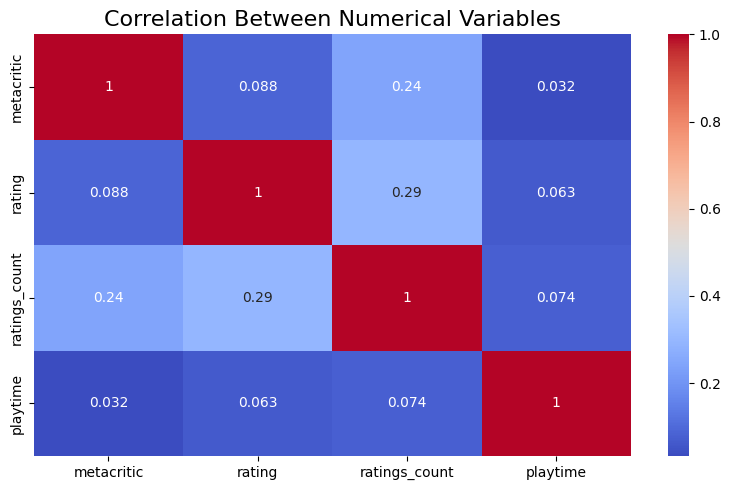

In [33]:
plt.figure(figsize=(8,5))
sns.heatmap(rawg[['metacritic', 'rating', 'ratings_count', 'playtime']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Numerical Variables", fontsize=16)
plt.tight_layout()
plt.show()

**ANOVA: Does Genre Affect Rating?**

In [34]:
anova_data = rawg_explode[['genres', 'rating']].dropna()
model = ols('rating ~ C(genres)', data=anova_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Result:\n", anova_table)

ANOVA Result:
                   sum_sq        df           F  PR(>F)
C(genres)    6695.380172      18.0  132.954915     0.0
Residual   315841.504490  112894.0         NaN     NaN


**Shapiro-Wilk Test for Normality of Rating**

In [35]:

shapiro_test = shapiro(rawg['rating'].dropna().sample(500, random_state=1))
print(f"Shapiro-Wilk Test: W = {shapiro_test.statistic:.3f}, p-value = {shapiro_test.pvalue:.4f}")

Shapiro-Wilk Test: W = 0.697, p-value = 0.0000
